# Random Forests

Here we use the RandomForestClassifier from sklearn's tree module to classify Gentoo and Chinstrap penguins. To start, we import the necessary libraries, load the [penguins dataset](https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv "Title"), and preprocess the data:

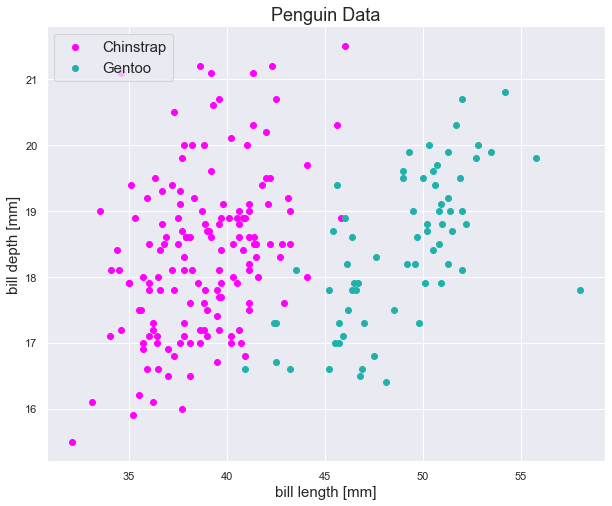

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Set Theme
sns.set_theme()

# Load penguin data 
penguins = sns.load_dataset("penguins")

Adelie = penguins[penguins.species == "Adelie"]
Chinstrap = penguins[penguins.species == "Chinstrap"]
Gentoo = penguins[penguins.species == "Gentoo"]

# Create feature matrix
X = penguins.iloc[:222][["bill_length_mm", "bill_depth_mm"]].values
X = X[~np.isnan(X).any(axis=1)] # removing rows with NaN's
y = np.where(penguins.iloc[:222].species == "Adelie", 0, 1)
y = np.delete(y, 3)

plt.figure(figsize = (10, 8))
plt.scatter(Adelie.bill_length_mm, 
            Adelie.bill_depth_mm, 
            color = "magenta", 
            label = "Chinstrap")
plt.scatter(Chinstrap.bill_length_mm, 
            Chinstrap.bill_depth_mm, 
            color = "lightseagreen", 
            label = "Gentoo")
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Penguin Data", fontsize = 18)
plt.show()

We fit a decision tree, a bagging classifier, and a random forest to the training data, and note that we only train on  bill length and bill depth measurements. The classification reports for each model are printed below:

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)


tree_clf = DecisionTreeClassifier(max_depth=15, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        64
           1       0.88      0.92      0.90        25

    accuracy                           0.94        89
   macro avg       0.93      0.94      0.93        89
weighted avg       0.94      0.94      0.94        89
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.92      0.96      0.94        25

    accuracy                           0.97        89
   macro avg       0.95      0.96      0.96        89
weighted avg       0.97      0.97      0.97        89
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.92      0.96      0.94        25

    accuracy                           0.97        89
   macro avg       0.95      0.96     

We see from the above classification reports that the bagging classifier and the random forest perform equally well and better than the decision tree. We plot the decision regions generated by each of these 3 models below:

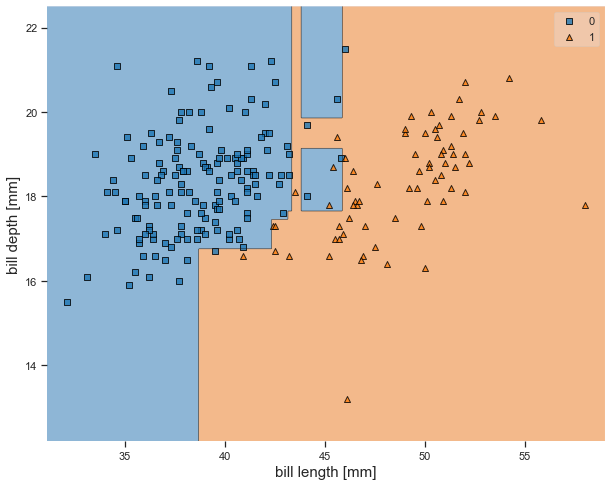

In [7]:
# Decision tree

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.grid()
plt.show()

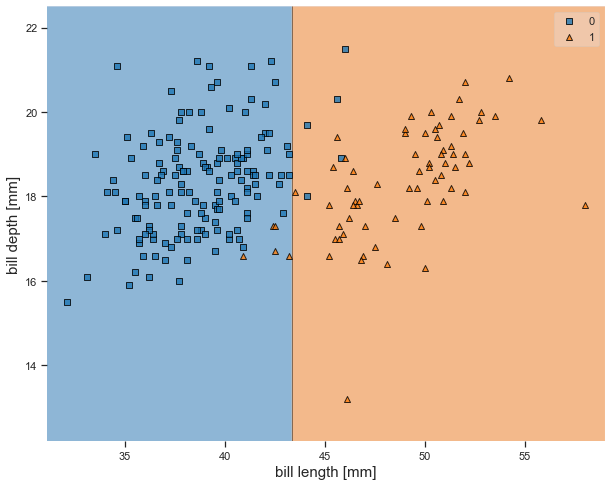

In [8]:
# Bagging classifier

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.grid()
plt.show()

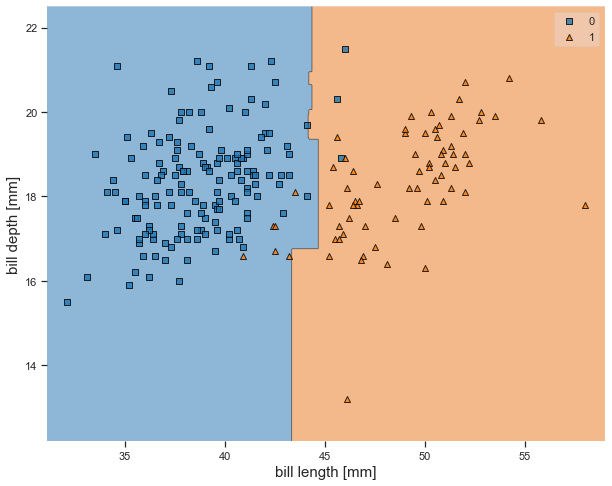

In [9]:
# Random forest

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.grid()
plt.show()

We use these 3 models again, but this time we train one two additional features: flipper length and body mass. The classification reports are again printed:

In [14]:
X = penguins.iloc[:222][["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()
X = X[~np.isnan(X).any(axis=1)] # removing rows with NaN's

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 2)

tree_clf = DecisionTreeClassifier(max_depth=15, random_state=2,)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=2),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = bag_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        62
           1       0.89      0.93      0.91        27

    accuracy                           0.94        89
   macro avg       0.93      0.94      0.93        89
weighted avg       0.94      0.94      0.94        89
 

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        62
           1       0.83      0.93      0.88        27

    accuracy                           0.92        89
   macro avg       0.90      0.92      0.91        89
weighted avg       0.93      0.92      0.92        89
 

Forest Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        62
           1       0.83      0.93      0.88        27

    accuracy                           0.92        89
   macro avg       0.90      0.92     

Looking at the above classification reports, we see that each model still performs well overall! However, with the addition of the flipper length and body mass features, our bagging classifier and random forest models perfom worse than before. This is due to the addition of new features that the model has to work with, which complicates the learning process.

We finish by showing the importance of each feature in the forest classifier:

In [15]:
names = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

bill_length_mm 0.4839999999999999
bill_depth_mm 0.06599999999999999
flipper_length_mm 0.33799999999999997
body_mass_g 0.11199999999999997


This concludes our analysis of random forests!